# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base_models import BaseModel
from model_creator import Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': False,
        'save_trained_model': False,
        'orig_model_experiment_id': 'ICAO-239',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 87614
Process ID: 102628
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',
 

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


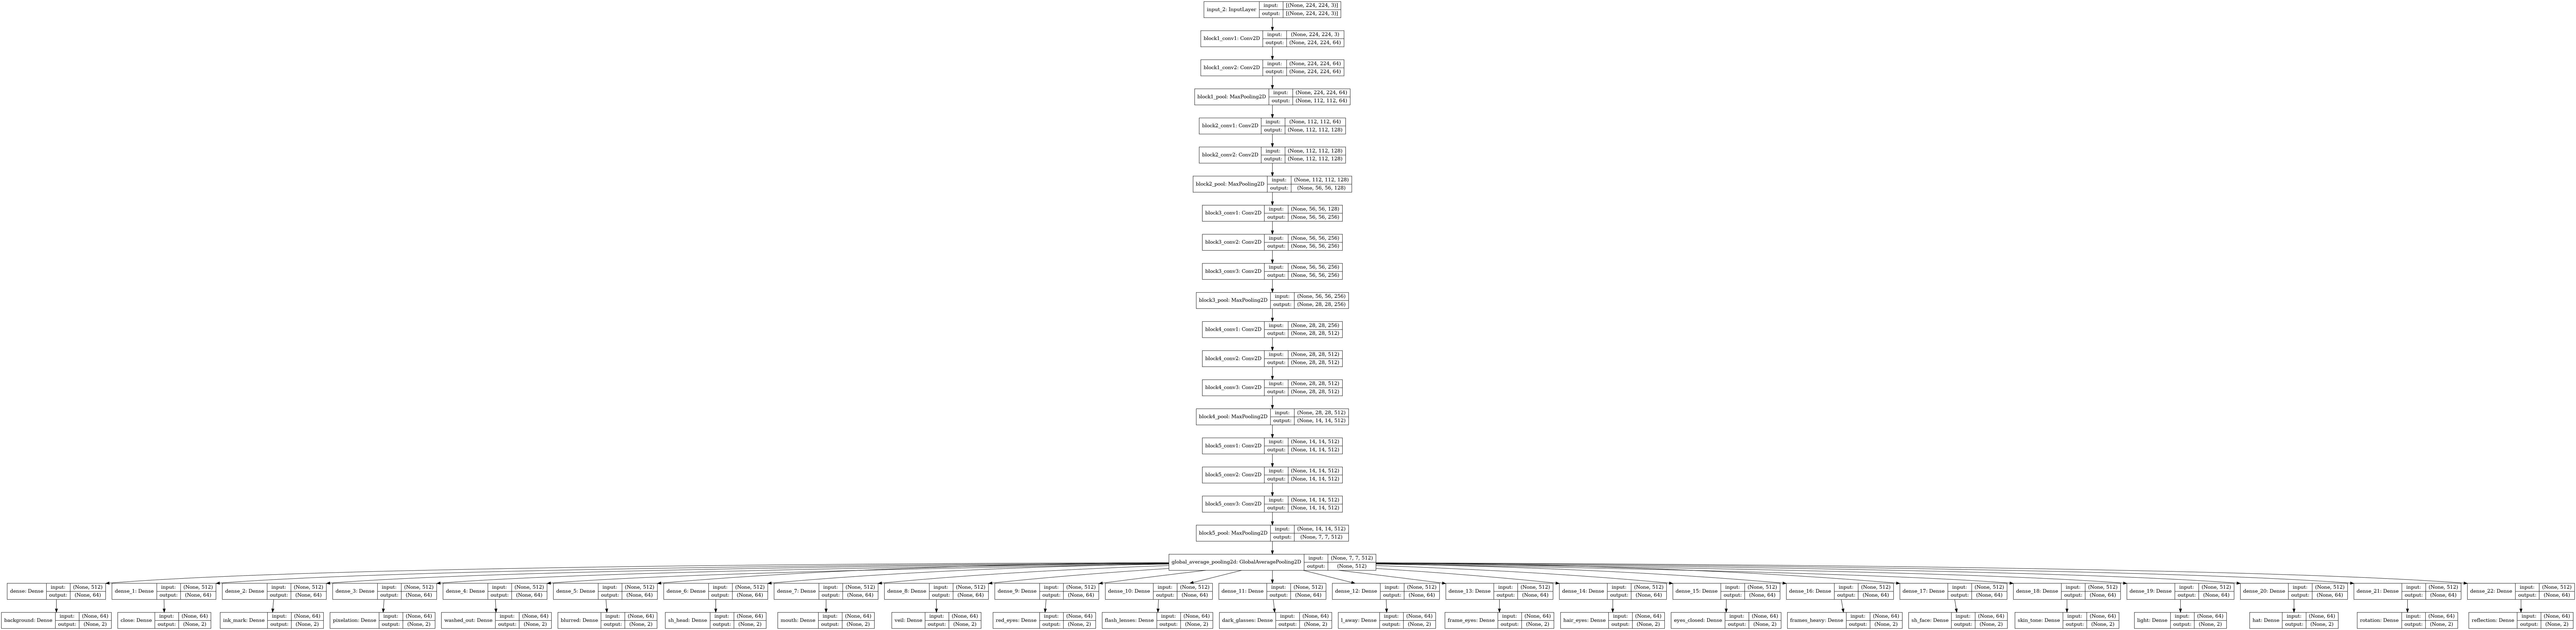

In [11]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [12]:
runner.model_summary()

Not training a model!


# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Not training a model. Downloading data from Neptune
 ..Experiment ID: ICAO-239
 ..Downloading data from previous experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-239
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..Download finished
 ..Upload data to current experiment
 ..

# Plots

In [14]:
runner.draw_training_history()

-------------------- draw training history -------------------
Not training a model. Downloading plot from Neptune
 ..Experiment ID: ICAO-239
 ..Downloading plot from previous experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-239
 ..Download finished
 ..Uploading plot
 ..Upload finished


# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Model loaded
...Model path: prev_trained_models/multi_task/fvc_not_aligned/multi_reqs/ICAO-239


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 36s 2s/step
Prediction finished!
Requisite: MOUTH


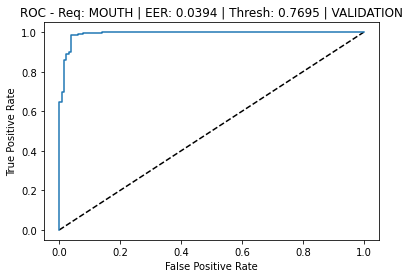

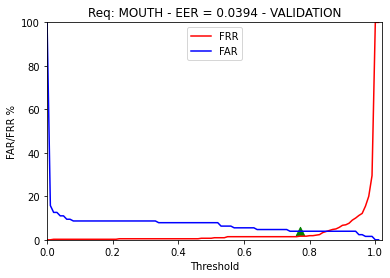

Requisite: MOUTH - EER_interp: 3.94% - Best Threshold: 0.769456982605481
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.95      0.96      0.96       127
    COMPLIANT       0.99      0.99      0.99       420

     accuracy                           0.98       547
    macro avg       0.97      0.97      0.97       547
 weighted avg       0.98      0.98      0.98       547

Confusion matrix ----------------------------------------
FAR: 3.94% | FRR: 1.43% | EER_mean: 2.68% | TP: 414 | TN: 122 | FP: 5 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 97.99%
---------------------------------------------------------
Requisite: ROTATION


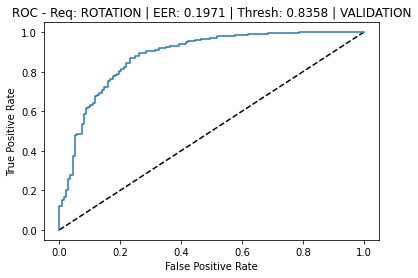

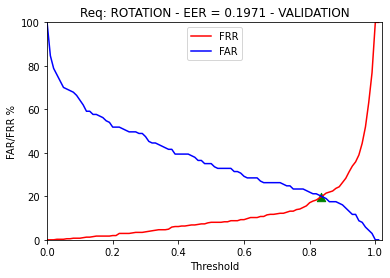

Requisite: ROTATION - EER_interp: 19.71% - Best Threshold: 0.8357789516447253
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.80      0.67       137
    COMPLIANT       0.92      0.80      0.86       410

     accuracy                           0.80       547
    macro avg       0.75      0.80      0.77       547
 weighted avg       0.84      0.80      0.81       547

Confusion matrix ----------------------------------------
FAR: 19.71% | FRR: 19.509999999999998% | EER_mean: 19.61% | TP: 330 | TN: 110 | FP: 27 | FN: 80
Accuracy ------------------------------------------------
Model Accuracy: 80.44%
---------------------------------------------------------
Requisite: L_AWAY


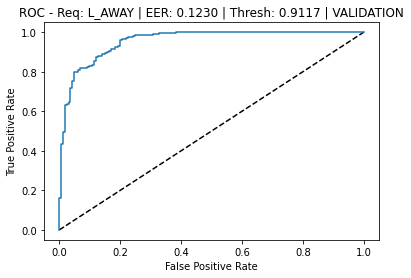

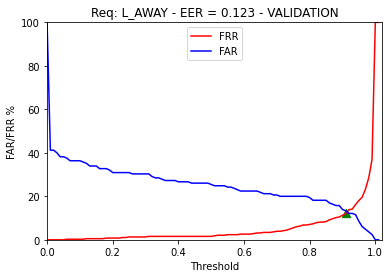

Requisite: L_AWAY - EER_interp: 12.3% - Best Threshold: 0.911700196759239
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.76      0.88      0.81       165
    COMPLIANT       0.94      0.88      0.91       382

     accuracy                           0.88       547
    macro avg       0.85      0.88      0.86       547
 weighted avg       0.89      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 12.120000000000001% | FRR: 12.3% | EER_mean: 12.21% | TP: 335 | TN: 145 | FP: 20 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 87.75%
---------------------------------------------------------
Requisite: EYES_CLOSED


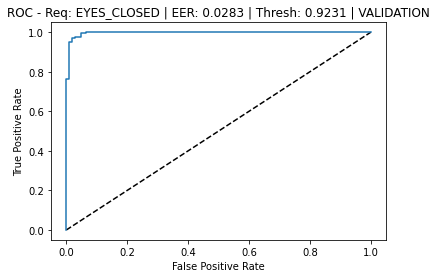

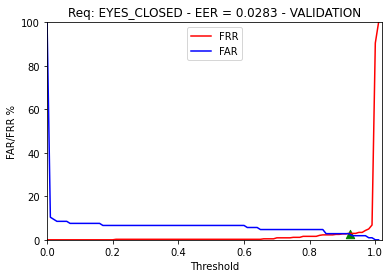

Requisite: EYES_CLOSED - EER_interp: 2.83% - Best Threshold: 0.9231120347992677
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.97      0.93       106
    COMPLIANT       0.99      0.97      0.98       441

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.95       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 2.83% | FRR: 2.9499999999999997% | EER_mean: 2.8899999999999997% | TP: 428 | TN: 103 | FP: 3 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 97.07000000000001%
---------------------------------------------------------
Requisite: CLOSE


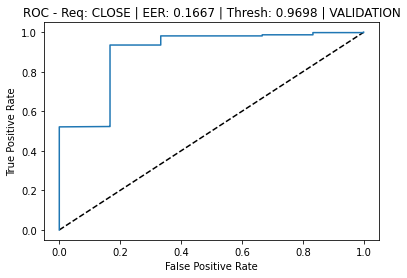

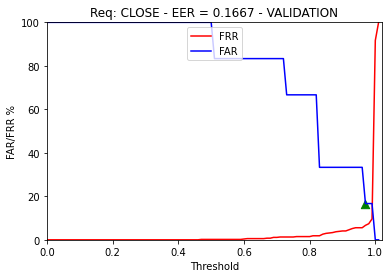

Requisite: CLOSE - EER_interp: 16.669999999999998% - Best Threshold: 0.9698455333709675
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.83      0.22         6
    COMPLIANT       1.00      0.94      0.97       541

     accuracy                           0.93       547
    macro avg       0.56      0.88      0.59       547
 weighted avg       0.99      0.93      0.96       547

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 6.47% | EER_mean: 11.57% | TP: 506 | TN: 5 | FP: 1 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 93.42%
---------------------------------------------------------
Requisite: HAT


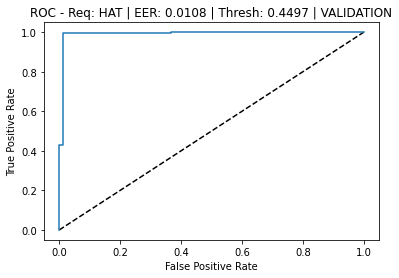

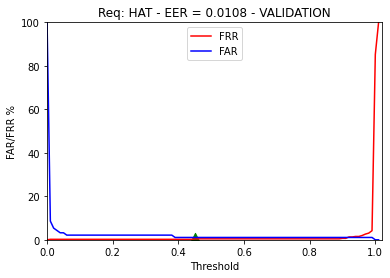

Requisite: HAT - EER_interp: 1.08% - Best Threshold: 0.4497121572494441
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.99      0.99      0.99        93
    COMPLIANT       1.00      1.00      1.00       454

     accuracy                           1.00       547
    macro avg       0.99      0.99      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 1.08% | FRR: 0.22% | EER_mean: 0.65% | TP: 453 | TN: 92 | FP: 1 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.63%
---------------------------------------------------------
Requisite: DARK_GLASSES


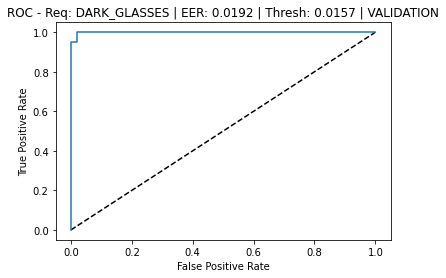

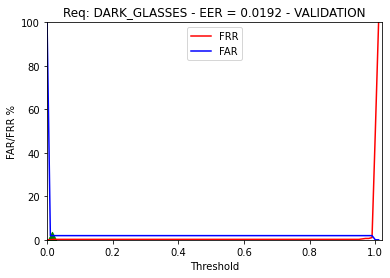

Requisite: DARK_GLASSES - EER_interp: 1.92% - Best Threshold: 0.015716126188614746
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.98      0.99        52
    COMPLIANT       1.00      1.00      1.00       495

     accuracy                           1.00       547
    macro avg       1.00      0.99      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 1.92% | FRR: 0.0% | EER_mean: 0.96% | TP: 495 | TN: 51 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.82%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


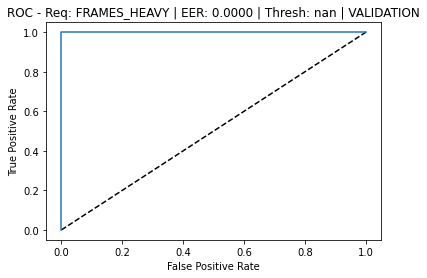

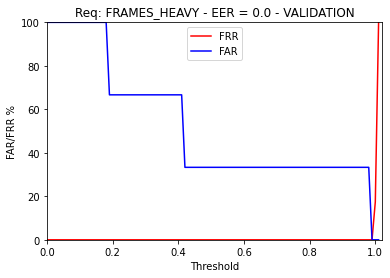

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         3
    COMPLIANT       0.99      1.00      1.00       544

     accuracy                           0.99       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 544 | TN: 0 | FP: 3 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.45%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


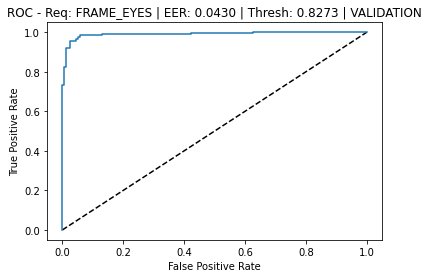

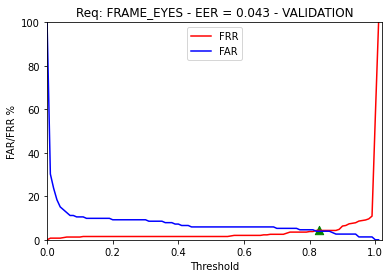

Requisite: FRAME_EYES - EER_interp: 4.3% - Best Threshold: 0.8272816693229518
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.96      0.93       152
    COMPLIANT       0.98      0.96      0.97       395

     accuracy                           0.96       547
    macro avg       0.94      0.96      0.95       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.95% | FRR: 4.3% | EER_mean: 4.12% | TP: 378 | TN: 146 | FP: 6 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 95.8%
---------------------------------------------------------
Requisite: FLASH_LENSES


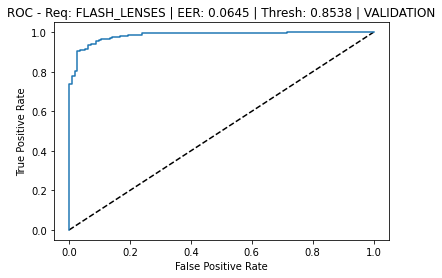

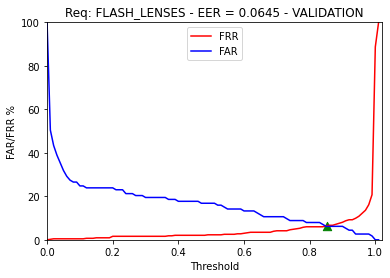

Requisite: FLASH_LENSES - EER_interp: 6.45% - Best Threshold: 0.8538243578323658
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.94      0.86       113
    COMPLIANT       0.98      0.94      0.96       434

     accuracy                           0.94       547
    macro avg       0.89      0.94      0.91       547
 weighted avg       0.94      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 6.1899999999999995% | FRR: 6.45% | EER_mean: 6.32% | TP: 406 | TN: 106 | FP: 7 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 93.60000000000001%
---------------------------------------------------------
Requisite: VEIL


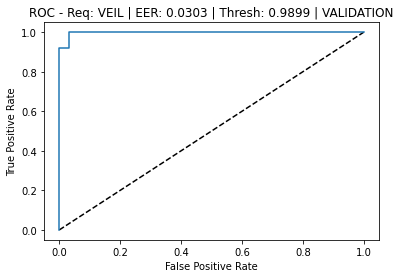

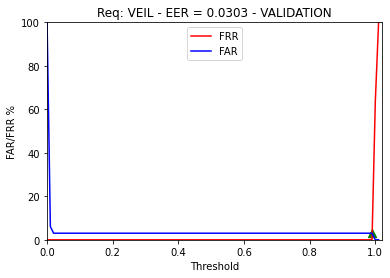

Requisite: VEIL - EER_interp: 3.0300000000000002% - Best Threshold: 0.9898878931996287
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.97      0.98        33
    COMPLIANT       1.00      1.00      1.00       514

     accuracy                           1.00       547
    macro avg       1.00      0.98      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 3.0300000000000002% | FRR: 0.0% | EER_mean: 1.52% | TP: 514 | TN: 32 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.82%
---------------------------------------------------------
Requisite: REFLECTION


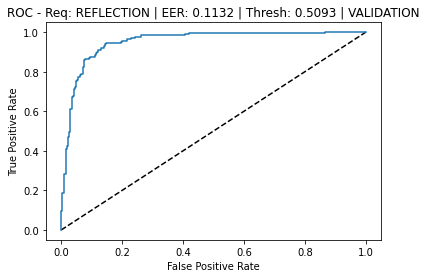

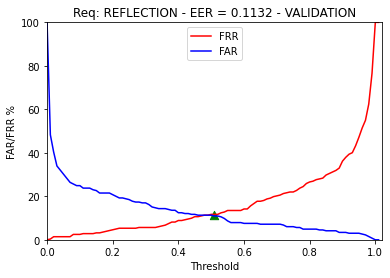

Requisite: REFLECTION - EER_interp: 11.32% - Best Threshold: 0.5093150734970754
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.89      0.88       265
    COMPLIANT       0.89      0.88      0.89       282

     accuracy                           0.88       547
    macro avg       0.88      0.88      0.88       547
 weighted avg       0.88      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 11.32% | FRR: 11.700000000000001% | EER_mean: 11.51% | TP: 249 | TN: 235 | FP: 30 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 88.48%
---------------------------------------------------------
Requisite: LIGHT


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


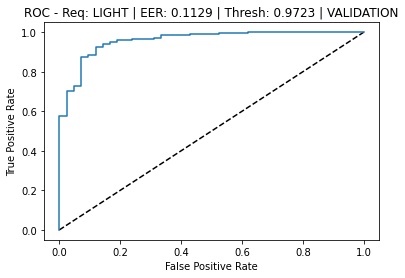

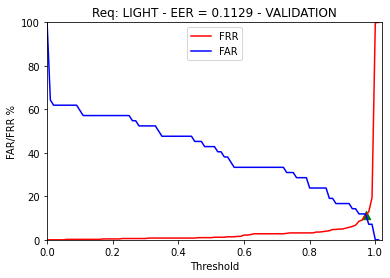

Requisite: LIGHT - EER_interp: 11.29% - Best Threshold: 0.9722697614443275
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.40      0.90      0.55        42
    COMPLIANT       0.99      0.89      0.94       505

     accuracy                           0.89       547
    macro avg       0.70      0.90      0.75       547
 weighted avg       0.95      0.89      0.91       547

Confusion matrix ----------------------------------------
FAR: 9.520000000000001% | FRR: 11.29% | EER_mean: 10.4% | TP: 448 | TN: 38 | FP: 4 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 88.85%
---------------------------------------------------------
Requisite: SH_FACE


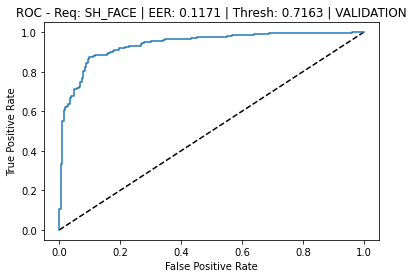

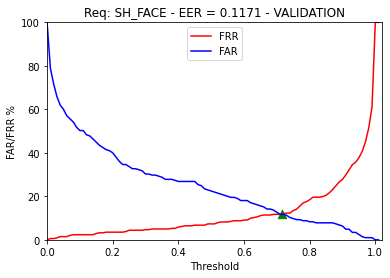

Requisite: SH_FACE - EER_interp: 11.709999999999999% - Best Threshold: 0.7162637710570282
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.88      0.85       205
    COMPLIANT       0.93      0.88      0.90       342

     accuracy                           0.88       547
    macro avg       0.87      0.88      0.88       547
 weighted avg       0.89      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 11.709999999999999% | FRR: 11.700000000000001% | EER_mean: 11.700000000000001% | TP: 302 | TN: 181 | FP: 24 | FN: 40
Accuracy ------------------------------------------------
Model Accuracy: 88.3%
---------------------------------------------------------
Requisite: SH_HEAD


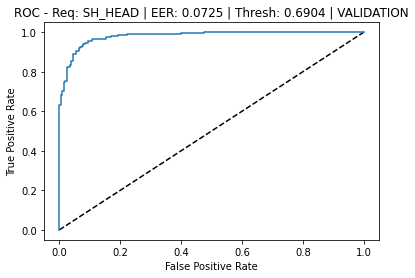

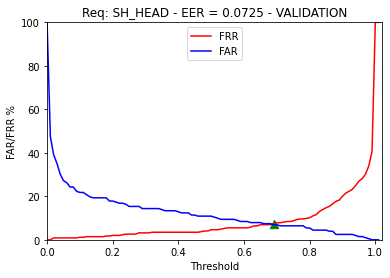

Requisite: SH_HEAD - EER_interp: 7.249999999999999% - Best Threshold: 0.6903633095215989
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.93      0.91       202
    COMPLIANT       0.96      0.93      0.94       345

     accuracy                           0.93       547
    macro avg       0.92      0.93      0.92       547
 weighted avg       0.93      0.93      0.93       547

Confusion matrix ----------------------------------------
FAR: 6.93% | FRR: 7.249999999999999% | EER_mean: 7.090000000000001% | TP: 320 | TN: 188 | FP: 14 | FN: 25
Accuracy ------------------------------------------------
Model Accuracy: 92.86999999999999%
---------------------------------------------------------
Requisite: BLURRED


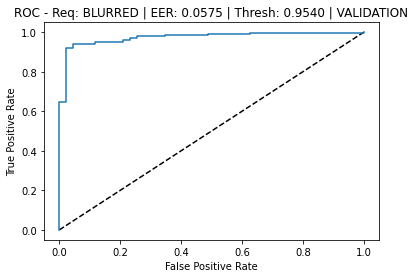

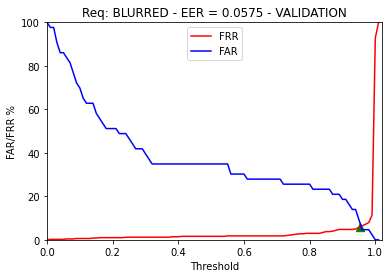

Requisite: BLURRED - EER_interp: 5.75% - Best Threshold: 0.9539840894322859
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.93      0.71        43
    COMPLIANT       0.99      0.94      0.97       504

     accuracy                           0.94       547
    macro avg       0.79      0.94      0.84       547
 weighted avg       0.96      0.94      0.95       547

Confusion matrix ----------------------------------------
FAR: 6.98% | FRR: 5.75% | EER_mean: 6.36% | TP: 475 | TN: 40 | FP: 3 | FN: 29
Accuracy ------------------------------------------------
Model Accuracy: 94.15%
---------------------------------------------------------
Requisite: SKIN_TONE


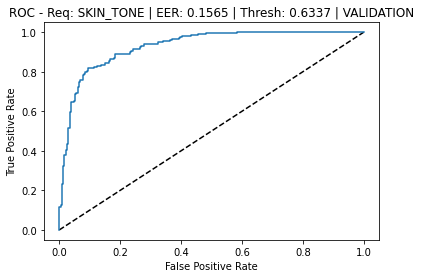

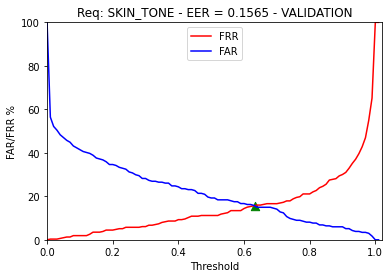

Requisite: SKIN_TONE - EER_interp: 15.65% - Best Threshold: 0.6337436080550233
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.85      0.82       234
    COMPLIANT       0.88      0.84      0.86       313

     accuracy                           0.84       547
    macro avg       0.84      0.84      0.84       547
 weighted avg       0.85      0.84      0.85       547

Confusion matrix ----------------------------------------
FAR: 15.379999999999999% | FRR: 15.65% | EER_mean: 15.52% | TP: 264 | TN: 198 | FP: 36 | FN: 49
Accuracy ------------------------------------------------
Model Accuracy: 84.46000000000001%
---------------------------------------------------------
Requisite: WASHED_OUT


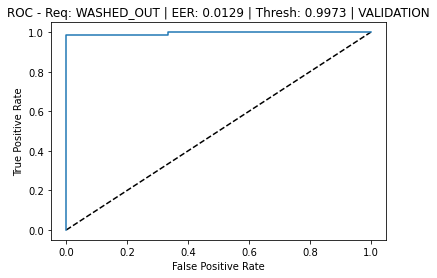

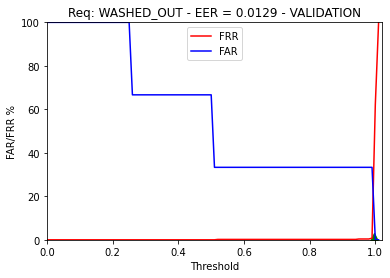

Requisite: WASHED_OUT - EER_interp: 1.29% - Best Threshold: 0.997269391137011
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      1.00      0.46         3
    COMPLIANT       1.00      0.99      0.99       544

     accuracy                           0.99       547
    macro avg       0.65      0.99      0.73       547
 weighted avg       1.00      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 1.29% | EER_mean: 0.64% | TP: 537 | TN: 3 | FP: 0 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 98.72%
---------------------------------------------------------
Requisite: PIXELATION


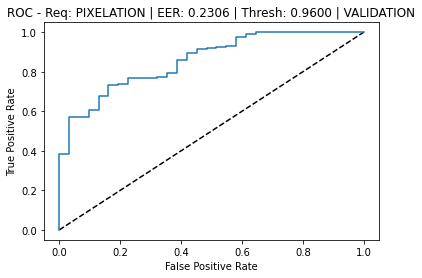

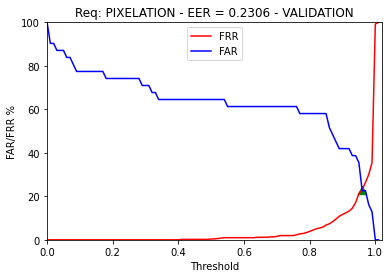

Requisite: PIXELATION - EER_interp: 23.06% - Best Threshold: 0.960009549438809
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      0.77      0.28        31
    COMPLIANT       0.98      0.77      0.86       516

     accuracy                           0.77       547
    macro avg       0.58      0.77      0.57       547
 weighted avg       0.94      0.77      0.83       547

Confusion matrix ----------------------------------------
FAR: 22.58% | FRR: 23.06% | EER_mean: 22.82% | TP: 397 | TN: 24 | FP: 7 | FN: 119
Accuracy ------------------------------------------------
Model Accuracy: 76.97%
---------------------------------------------------------
Requisite: HAIR_EYES


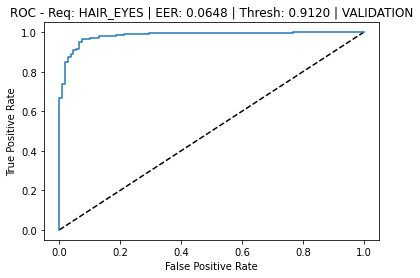

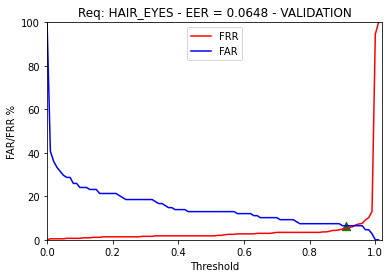

Requisite: HAIR_EYES - EER_interp: 6.4799999999999995% - Best Threshold: 0.9120261073101622
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.94      0.87       108
    COMPLIANT       0.98      0.95      0.97       439

     accuracy                           0.95       547
    macro avg       0.90      0.94      0.92       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 6.4799999999999995% | FRR: 5.01% | EER_mean: 5.74% | TP: 417 | TN: 101 | FP: 7 | FN: 22
Accuracy ------------------------------------------------
Model Accuracy: 94.69999999999999%
---------------------------------------------------------
Requisite: BACKGROUND


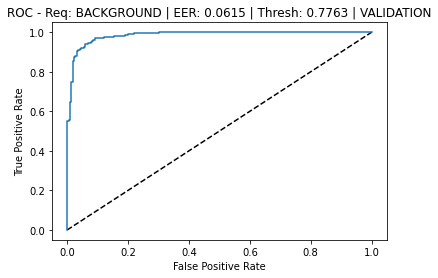

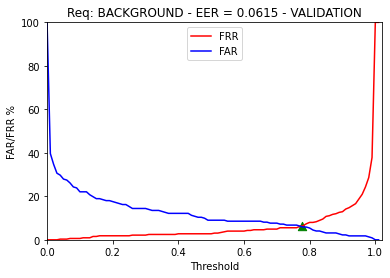

Requisite: BACKGROUND - EER_interp: 6.15% - Best Threshold: 0.7763346814192258
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.91      0.94      0.92       222
    COMPLIANT       0.96      0.94      0.95       325

     accuracy                           0.94       547
    macro avg       0.93      0.94      0.94       547
 weighted avg       0.94      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 6.3100000000000005% | FRR: 6.15% | EER_mean: 6.23% | TP: 305 | TN: 208 | FP: 14 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 93.78%
---------------------------------------------------------
Requisite: RED_EYES


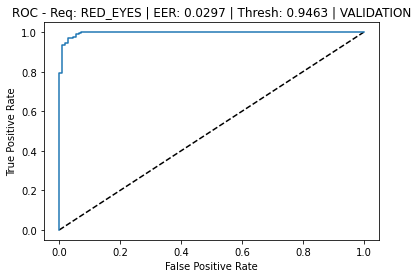

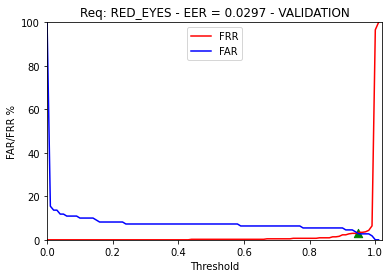

Requisite: RED_EYES - EER_interp: 2.97% - Best Threshold: 0.9463229682680125
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.97      0.93       110
    COMPLIANT       0.99      0.97      0.98       437

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.96       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 2.73% | FRR: 2.97% | EER_mean: 2.85% | TP: 424 | TN: 107 | FP: 3 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 97.07000000000001%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 16s 2s/step
Prediction finished!
Requisite: MOUTH


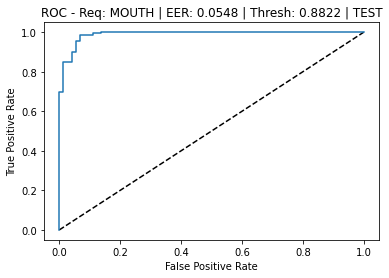

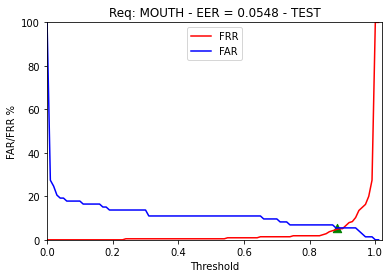

Requisite: MOUTH - EER_interp: 5.48% - Best Threshold: 0.8821966052053439
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.95      0.91        73
    COMPLIANT       0.98      0.95      0.97       215

     accuracy                           0.95       288
    macro avg       0.93      0.95      0.94       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 5.48% | FRR: 4.65% | EER_mean: 5.06% | TP: 205 | TN: 69 | FP: 4 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 95.14%
---------------------------------------------------------
Requisite: ROTATION


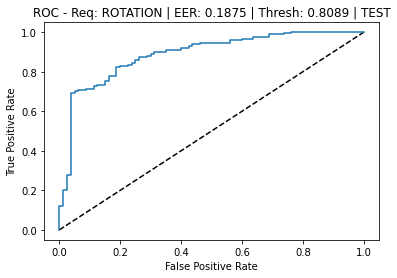

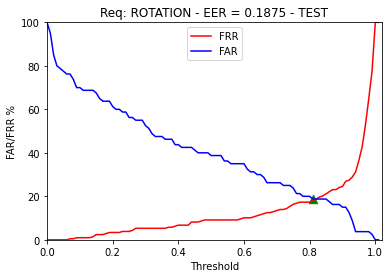

Requisite: ROTATION - EER_interp: 18.75% - Best Threshold: 0.8089418411254813
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.64      0.81      0.71        80
    COMPLIANT       0.92      0.82      0.87       208

     accuracy                           0.82       288
    macro avg       0.78      0.82      0.79       288
 weighted avg       0.84      0.82      0.83       288

Confusion matrix ----------------------------------------
FAR: 18.75% | FRR: 17.79% | EER_mean: 18.27% | TP: 171 | TN: 65 | FP: 15 | FN: 37
Accuracy ------------------------------------------------
Model Accuracy: 81.94%
---------------------------------------------------------
Requisite: L_AWAY


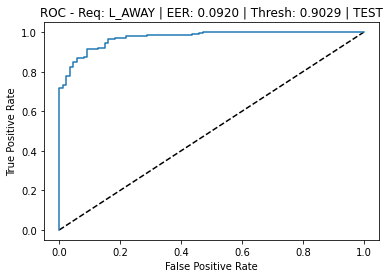

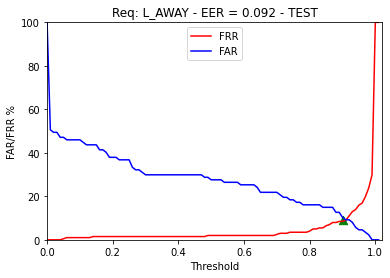

Requisite: L_AWAY - EER_interp: 9.2% - Best Threshold: 0.9028532505033001
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.91      0.86        87
    COMPLIANT       0.96      0.92      0.94       201

     accuracy                           0.91       288
    macro avg       0.89      0.91      0.90       288
 weighted avg       0.92      0.91      0.91       288

Confusion matrix ----------------------------------------
FAR: 9.2% | FRR: 8.459999999999999% | EER_mean: 8.83% | TP: 184 | TN: 79 | FP: 8 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 91.32000000000001%
---------------------------------------------------------
Requisite: EYES_CLOSED


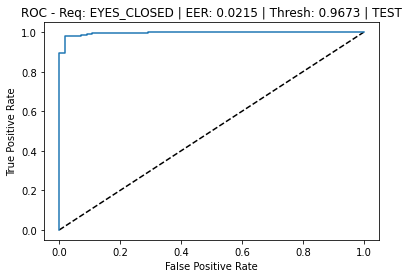

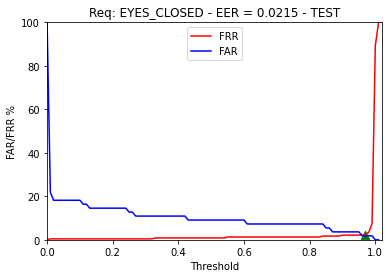

Requisite: EYES_CLOSED - EER_interp: 2.15% - Best Threshold: 0.9673066681546009
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.98      0.95        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.15% | EER_mean: 1.9800000000000002% | TP: 228 | TN: 54 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------
Requisite: CLOSE


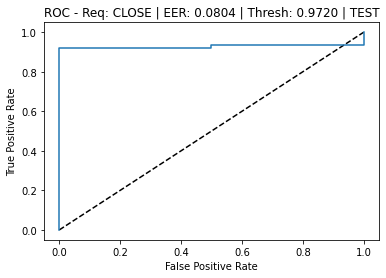

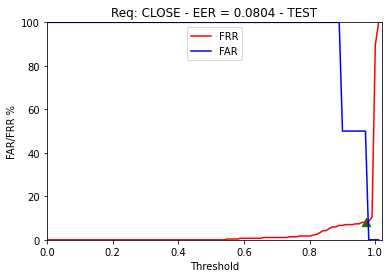

Requisite: CLOSE - EER_interp: 8.04% - Best Threshold: 0.9719630075501398
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      1.00      0.15         2
    COMPLIANT       1.00      0.92      0.96       286

     accuracy                           0.92       288
    macro avg       0.54      0.96      0.55       288
 weighted avg       0.99      0.92      0.95       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 8.04% | EER_mean: 4.02% | TP: 263 | TN: 2 | FP: 0 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 92.01%
---------------------------------------------------------
Requisite: HAT


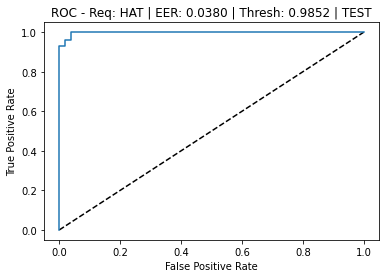

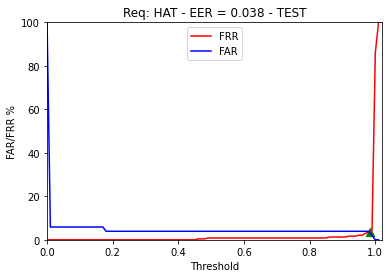

Requisite: HAT - EER_interp: 3.8% - Best Threshold: 0.985172673871246
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.98      0.91        51
    COMPLIANT       1.00      0.96      0.98       237

     accuracy                           0.97       288
    macro avg       0.92      0.97      0.94       288
 weighted avg       0.97      0.97      0.97       288

Confusion matrix ----------------------------------------
FAR: 1.96% | FRR: 3.8% | EER_mean: 2.88% | TP: 228 | TN: 50 | FP: 1 | FN: 9
Accuracy ------------------------------------------------
Model Accuracy: 96.53%
---------------------------------------------------------
Requisite: DARK_GLASSES


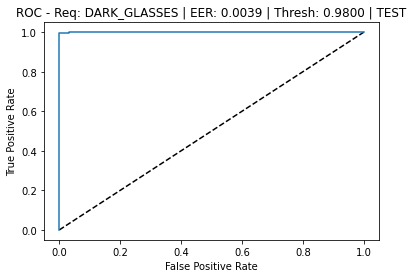

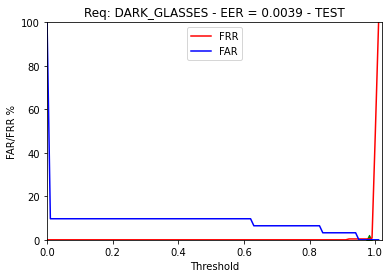

Requisite: DARK_GLASSES - EER_interp: 0.38999999999999996% - Best Threshold: 0.9799709688828614
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.97      1.00      0.98        31
    COMPLIANT       1.00      1.00      1.00       257

     accuracy                           1.00       288
    macro avg       0.98      1.00      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.38999999999999996% | EER_mean: 0.2% | TP: 256 | TN: 31 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


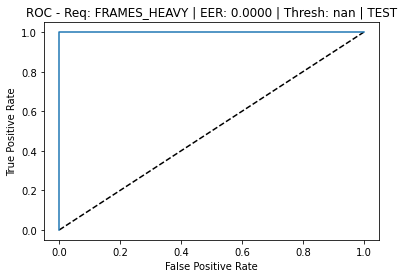

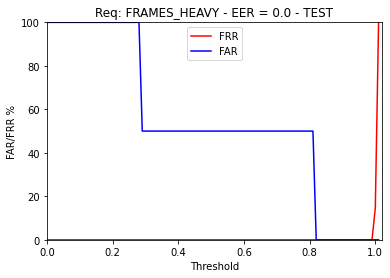

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


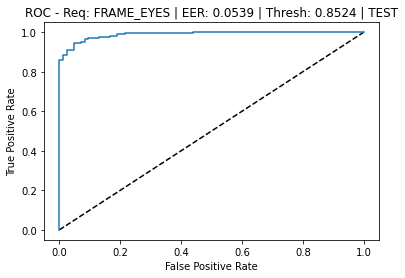

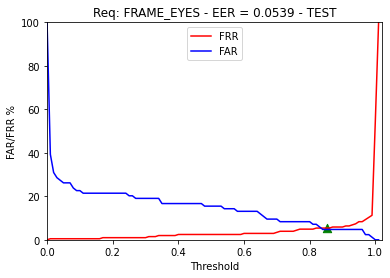

Requisite: FRAME_EYES - EER_interp: 5.390000000000001% - Best Threshold: 0.8523555958972256
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.95      0.91        84
    COMPLIANT       0.98      0.95      0.96       204

     accuracy                           0.95       288
    macro avg       0.93      0.95      0.94       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 5.390000000000001% | EER_mean: 5.08% | TP: 193 | TN: 80 | FP: 4 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Requisite: FLASH_LENSES


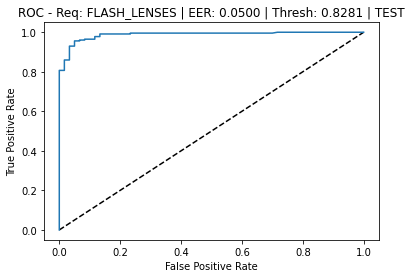

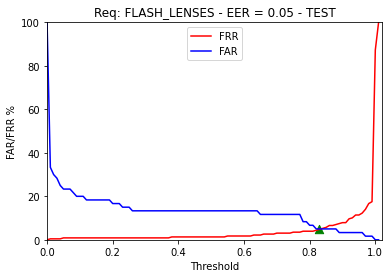

Requisite: FLASH_LENSES - EER_interp: 5.0% - Best Threshold: 0.8281459212302853
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.95      0.90        60
    COMPLIANT       0.99      0.96      0.97       228

     accuracy                           0.95       288
    macro avg       0.92      0.95      0.93       288
 weighted avg       0.96      0.95      0.96       288

Confusion matrix ----------------------------------------
FAR: 5.0% | FRR: 4.390000000000001% | EER_mean: 4.7% | TP: 218 | TN: 57 | FP: 3 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 95.49%
---------------------------------------------------------
Requisite: VEIL


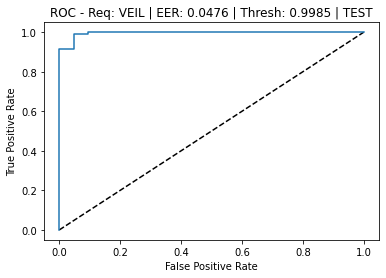

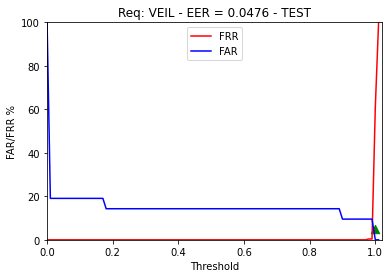

Requisite: VEIL - EER_interp: 4.760000000000001% - Best Threshold: 0.998517811298368
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.95      0.91        21
    COMPLIANT       1.00      0.99      0.99       267

     accuracy                           0.99       288
    macro avg       0.93      0.97      0.95       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 1.1199999999999999% | EER_mean: 2.94% | TP: 264 | TN: 20 | FP: 1 | FN: 3
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Requisite: REFLECTION


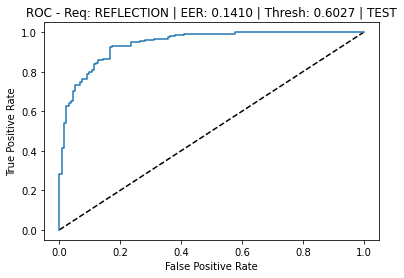

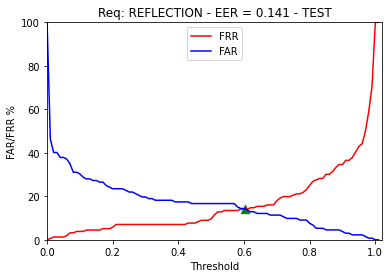

Requisite: REFLECTION - EER_interp: 14.099999999999998% - Best Threshold: 0.6026891080232768
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.86      0.85       132
    COMPLIANT       0.88      0.86      0.87       156

     accuracy                           0.86       288
    macro avg       0.86      0.86      0.86       288
 weighted avg       0.86      0.86      0.86       288

Confusion matrix ----------------------------------------
FAR: 13.639999999999999% | FRR: 14.099999999999998% | EER_mean: 13.87% | TP: 134 | TN: 114 | FP: 18 | FN: 22
Accuracy ------------------------------------------------
Model Accuracy: 86.11%
---------------------------------------------------------
Requisite: LIGHT


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


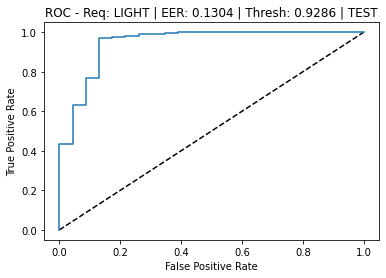

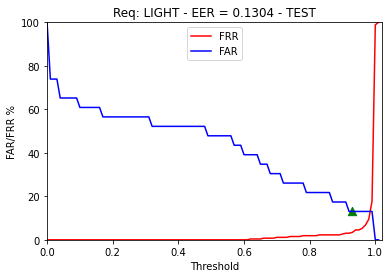

Requisite: LIGHT - EER_interp: 13.04% - Best Threshold: 0.9286169409748926
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.71      0.87      0.78        23
    COMPLIANT       0.99      0.97      0.98       265

     accuracy                           0.96       288
    macro avg       0.85      0.92      0.88       288
 weighted avg       0.97      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 13.04% | FRR: 3.02% | EER_mean: 8.03% | TP: 257 | TN: 20 | FP: 3 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 96.17999999999999%
---------------------------------------------------------
Requisite: SH_FACE


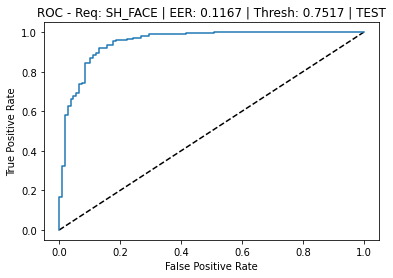

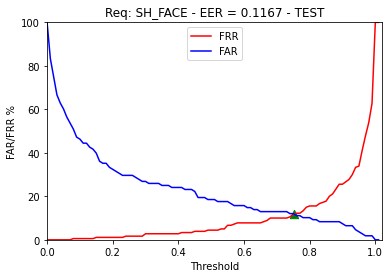

Requisite: SH_FACE - EER_interp: 11.67% - Best Threshold: 0.7516605973243721
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.89      0.85       108
    COMPLIANT       0.93      0.88      0.91       180

     accuracy                           0.89       288
    macro avg       0.88      0.89      0.88       288
 weighted avg       0.89      0.89      0.89       288

Confusion matrix ----------------------------------------
FAR: 11.110000000000001% | FRR: 11.67% | EER_mean: 11.39% | TP: 159 | TN: 96 | FP: 12 | FN: 21
Accuracy ------------------------------------------------
Model Accuracy: 88.53999999999999%
---------------------------------------------------------
Requisite: SH_HEAD


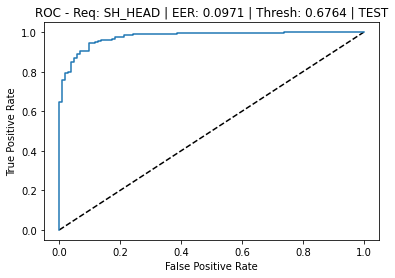

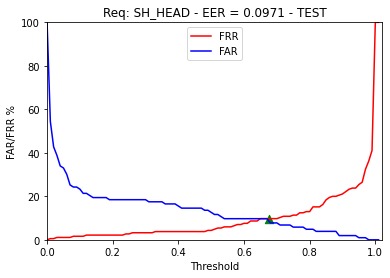

Requisite: SH_HEAD - EER_interp: 9.71% - Best Threshold: 0.6763824820536819
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.90      0.87       103
    COMPLIANT       0.94      0.90      0.92       185

     accuracy                           0.90       288
    macro avg       0.89      0.90      0.90       288
 weighted avg       0.91      0.90      0.90       288

Confusion matrix ----------------------------------------
FAR: 9.71% | FRR: 9.73% | EER_mean: 9.719999999999999% | TP: 167 | TN: 93 | FP: 10 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 90.28%
---------------------------------------------------------
Requisite: BLURRED


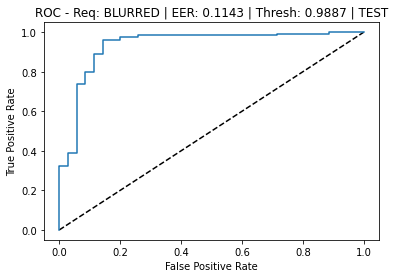

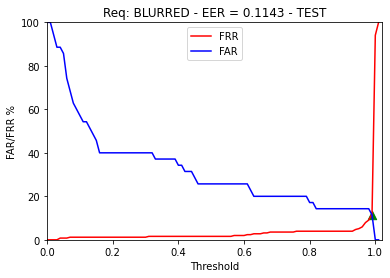

Requisite: BLURRED - EER_interp: 11.43% - Best Threshold: 0.988665103912352
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.89      0.66        35
    COMPLIANT       0.98      0.89      0.93       253

     accuracy                           0.89       288
    macro avg       0.75      0.89      0.80       288
 weighted avg       0.93      0.89      0.90       288

Confusion matrix ----------------------------------------
FAR: 11.43% | FRR: 11.07% | EER_mean: 11.25% | TP: 225 | TN: 31 | FP: 4 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 88.89%
---------------------------------------------------------
Requisite: SKIN_TONE


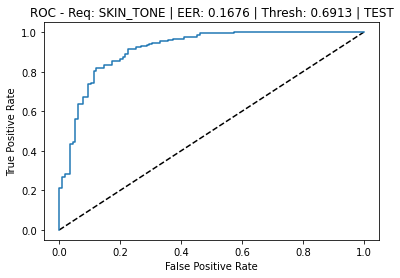

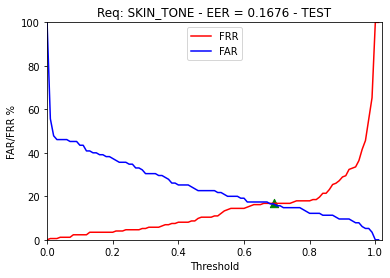

Requisite: SKIN_TONE - EER_interp: 16.76% - Best Threshold: 0.6912822466135904
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.83      0.80       115
    COMPLIANT       0.88      0.83      0.86       173

     accuracy                           0.83       288
    macro avg       0.83      0.83      0.83       288
 weighted avg       0.84      0.83      0.83       288

Confusion matrix ----------------------------------------
FAR: 16.520000000000003% | FRR: 16.76% | EER_mean: 16.64% | TP: 144 | TN: 96 | FP: 19 | FN: 29
Accuracy ------------------------------------------------
Model Accuracy: 83.33%
---------------------------------------------------------
Requisite: WASHED_OUT


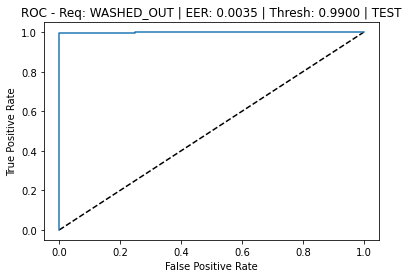

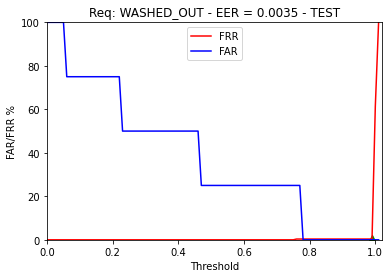

Requisite: WASHED_OUT - EER_interp: 0.35000000000000003% - Best Threshold: 0.9899833966308916
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      1.00      0.89         4
    COMPLIANT       1.00      1.00      1.00       284

     accuracy                           1.00       288
    macro avg       0.90      1.00      0.94       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.35000000000000003% | EER_mean: 0.18% | TP: 283 | TN: 4 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: PIXELATION


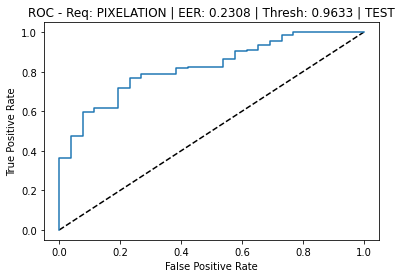

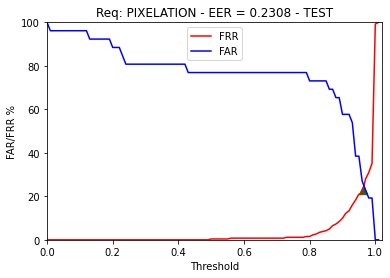

Requisite: PIXELATION - EER_interp: 23.080000000000002% - Best Threshold: 0.963319242000563
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.77      0.38        26
    COMPLIANT       0.97      0.77      0.86       262

     accuracy                           0.77       288
    macro avg       0.61      0.77      0.62       288
 weighted avg       0.91      0.77      0.82       288

Confusion matrix ----------------------------------------
FAR: 23.080000000000002% | FRR: 22.900000000000002% | EER_mean: 22.99% | TP: 202 | TN: 20 | FP: 6 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 77.08%
---------------------------------------------------------
Requisite: HAIR_EYES


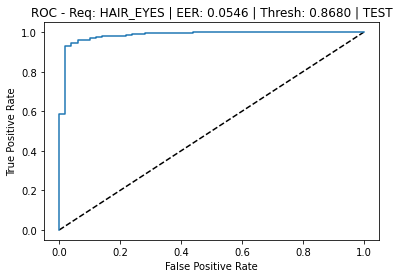

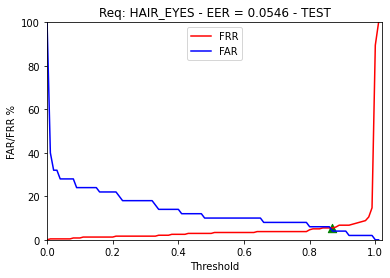

Requisite: HAIR_EYES - EER_interp: 5.46% - Best Threshold: 0.8679939092708235
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.96      0.86        50
    COMPLIANT       0.99      0.95      0.97       238

     accuracy                           0.95       288
    macro avg       0.89      0.95      0.92       288
 weighted avg       0.96      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 4.0% | FRR: 5.46% | EER_mean: 4.73% | TP: 225 | TN: 48 | FP: 2 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Requisite: BACKGROUND


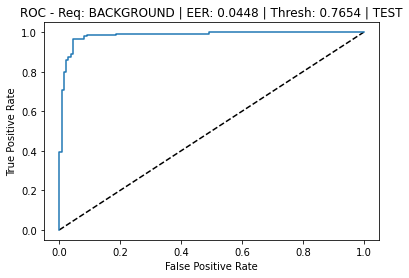

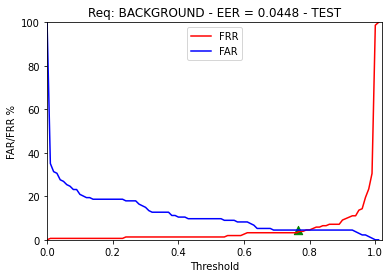

Requisite: BACKGROUND - EER_interp: 4.4799999999999995% - Best Threshold: 0.7653603553679711
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.96      0.96      0.96       134
    COMPLIANT       0.96      0.97      0.96       154

     accuracy                           0.96       288
    macro avg       0.96      0.96      0.96       288
 weighted avg       0.96      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 4.4799999999999995% | FRR: 3.25% | EER_mean: 3.8699999999999997% | TP: 149 | TN: 128 | FP: 6 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 96.17999999999999%
---------------------------------------------------------
Requisite: RED_EYES


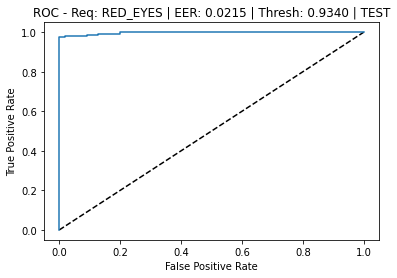

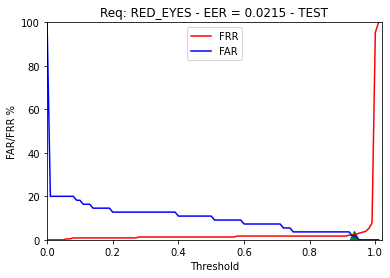

Requisite: RED_EYES - EER_interp: 2.15% - Best Threshold: 0.9339584703097528
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.98      0.95        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.15% | EER_mean: 1.9800000000000002% | TP: 228 | TN: 54 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------


In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
